In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import os
import string as s

In [2]:
#deine the path to save the plots
plot_path = '/Users/Briana/Documents/Grad_School/HPS/Paper_Plots'
sns.set_context('paper')
sns.set_palette("colorblind")

# Read in data

In [3]:
hps = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/HPS_dataframes/HPS_all_props.csv')
print hps.columns
print hps[hps['HPS_name']=='HPS100021+021351'].DEC

Index([u'Unnamed: 0', u'Selection', u'HPS_name', u'Hb_absorption', u'ID',
       u'Source', u'[Ha]6562', u'[Ha]6562_e', u'[Hb]4861', u'[Hb]4861_e',
       u'[NII]6583', u'[NII]6583_e', u'[NeIII]3870', u'[NeIII]3870_e',
       u'[Ne]3870', u'[OIII]5007', u'[OIII]5007_e', u'[OIII]_HPS',
       u'[OIII]_e_HPS', u'[OII]3727', u'[OII]3727_e', u'E(B-V)', u'E(B-V)_err',
       u'OIII_int_err', u'OIII_intrinsic', u'met_err', u'metallicity', u'z',
       u'LogM', u'LogM_eu', u'LogM_el', u'LogM_e', u'met_eu', u'met_el',
       u'E(B-V)_eu', u'E(B-V)_el', u'OII_corr', u'OII_corr_eu', u'OII_corr_el',
       u'Lum_dist', u'SFR', u'SFR_met_corr', u'SFR_met_corr_eu',
       u'SFR_met_corr_el', u'SFR_eu', u'SFR_el', u'log_SFR_met_corr',
       u'log_SFR_met_corr_el', u'log_SFR_met_corr_eu', u'RA', u'DEC',
       u'OII_EW', u'OIII_EW'],
      dtype='object')
27    2.230972
Name: DEC, dtype: float64


# Data for other populations

In [4]:
#table for blueberry sample 
#Yang 2017
bb_paper = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/blueberries/yang2017_blueberries.csv')
bb_paper.rename(columns={'ObjID':'Obj_ID'}, inplace=True)
bb_paper = bb_paper.loc[:,['Obj_ID', '12+log(O/H)','e_12+log(O/H)']]
bb_paper.rename(columns={'12+log(O/H)':'met_paper', 'e_12+log(O/H)':'met_err_paper'}, inplace=True)

bb = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/blueberries/bb_met_emcee/bb_metallicty_measures.csv') 
bb_mass = bb['logM*']
bb_mass_cab = bb_mass - 0.04
bb_metals = bb['metallicity']

bb_merge = pd.merge(bb, bb_paper, how='left', on='Obj_ID')
bb_metals_paper = bb_merge['met_paper']

In [5]:
#table for blue compact dwarf sample 
#Lian 2016
bcd = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/blue_compact_dwarfs/bcd_met_emcee/bcd_metallicty_measures.csv')
bcd_mass = bcd['logM*']
bcd_mass_cab = bcd_mass - 0.04
bcd_metals = bcd['metallicity']

In [6]:
#table for green pea sample 
#Hawley 2012 (fluxes), Cardamone 2009 (masses)

#data from Izotov 2011 (contains met and mass from that paper and Cardomone 2009)
gp_paper = pd.read_table('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/green_peas/izotov2011_gp_table.dat', delim_whitespace=True)
gp_IDs = [np.int64(i) for i in gp_paper['SDSS_ID']]
gp_paper['Obj_ID'] = gp_IDs
gp_paper = gp_paper.loc[:,['Obj_ID', 'logM_card', 'met_card', 'logM_izotov', 'met_izotov']]

gp = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/green_peas/gp_met_emcee/gp_metallicty_measures.csv') 

gp_merge = pd.merge(gp, gp_paper, how='left', on='Obj_ID')
gp_merge = gp_merge[~np.isnan(gp_merge['met_card'])]

gp_metals = gp_merge['metallicity']

gp_metals_card   = gp_merge['met_card']
gp_metals_izotov = gp_merge['met_izotov']
gp_mass_card     = gp_merge['logM_card']
gp_mass_izotov   = gp_merge['logM_izotov']
gp_mass_izotov_cab = np.log10((10**gp_mass_izotov) * 0.61)

/Users/Briana/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """


In [7]:
#table for typical low mass galaxy population 
#Berg 2012, Lee 2016
lmg = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/typical_low_mass/berg2012_LMG_table.csv')
lmg = lmg.drop([14, 17])
lmg['logM_star'] = pd.to_numeric(lmg['logM_star'])

lmg_mass = lmg['logM_star']
lmg_mass_cab = np.log10((10**lmg_mass) * 0.61)
lmg_metals = lmg['12+log(O/H)']

#print lmg_mass, lmg_metals

In [8]:
sdss = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_metallicty_measures_mass_bins.csv')

#make a column with the upper and lower metallicity errors averaged
sdss['metallicity_e'] = [np.round(np.average([float(sdss['met_err'].iloc[i].split(',')[0][1::]), float(sdss['met_err'].iloc[i].split(',')[1][0:-1])]), 3) for i in range(len(sdss))]

tot_sdss_gal = sdss['Ngal'].sum(axis=0)
sdss['Ngal_norm'] = sdss['Ngal']/tot_sdss_gal
sdss['logM*_cab'] = sdss['logM*'] - 0.04
sdss['logM*lo_cab'] = sdss['logM*lo'] - 0.04
sdss['logM*up_cab'] = sdss['logM*up'] - 0.04

tot = sdss['Ngal_norm'].sum(axis=0)
print tot
print sdss.columns

print sdss.loc[:,['logM*_cab','metallicity', 'Ngal']]
#print sdss['logM*'].values


0.9999999999999999
Index([u'Unnamed: 0', u'logM*lo', u'logM*up', u'logM*', u'Ngal',
       u'metallicity', u'E(B-V)', u'OIII_intrinsic', u'met_err', u'E(B-V)_err',
       u'OIII_int_err', u'metallicity_e', u'Ngal_norm', u'logM*_cab',
       u'logM*lo_cab', u'logM*up_cab'],
      dtype='object')
    logM*_cab  metallicity     Ngal
0       6.973     9.066453      1.0
1       7.126     8.782423      4.0
2       7.206     8.162480      4.0
3       7.312     7.447966      4.0
4       7.424     7.801754      2.0
5       7.532     8.201278      9.0
6       7.610     7.924844      7.0
7       7.738     7.849081      9.0
8       7.817     8.134856      5.0
9       7.919     8.283232     12.0
10      8.018     8.160388     22.0
11      8.136     8.220796     42.0
12      8.214     8.257147     62.0
13      8.318     8.325230    114.0
14      8.419     8.322873    177.0
15      8.520     8.394660    306.0
16      8.613     8.455434    558.0
17      8.714     8.533699    884.0
18      8.814     8.

# Plot histograms

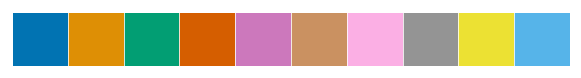

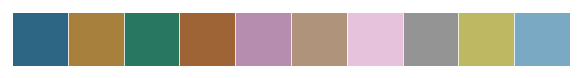

In [9]:
cmap=sns.color_palette('colorblind')
cmap_l = sns.color_palette('colorblind', desat=.5)
sns.palplot(cmap)
sns.palplot(cmap_l)

In [10]:
gp_c  = cmap[2]
bb_c  = cmap[0]
bcd_c = cmap[1]
lmg_c = 'black'
my_c  = 'red'

###   Mass

In [29]:
#Mass Bins

mass_bins = sdss['logM*_cab'].values
mass_lo = sdss['logM*lo_cab'].values
mass_up = sdss['logM*up_cab'].values
mass_av = (mass_lo+mass_up)/2.0

sdss_Ngal_per = sdss['Ngal_norm'].values

sdss_Ngal_half = sdss_Ngal_per[::2] + sdss_Ngal_per[1::2]
print sdss_Ngal_half
mass_lo_half = mass_lo[::2]
mass_up_half = mass_up[1::2]
mass_av_half = (mass_lo_half+mass_up_half)/2.0
mass_av_half = [round(i, 1) for i in mass_av_half]

hps_mass = hps['LogM'].values

num_hps = len(hps)

def build_hist_mass(data, bins, lo_bins, up_bins, num_objs):
    mass_freq = np.zeros(len(bins)/2)
    for i in range(len(bins)/2):
        c=0
        for j in data:
            if lo_bins[i] <= j < up_bins[i]:
                c = c+1
        mass_freq[i] = (float(c)/num_objs)
    return mass_freq
    
hps_mass_freq = build_hist_mass(hps_mass, mass_bins, mass_lo_half, mass_up_half, num_hps)
bb_mass_freq  = build_hist_mass(bb_mass_cab, mass_bins, mass_lo_half, mass_up_half, num_hps)
bcd_mass_freq = build_hist_mass(bcd_mass_cab, mass_bins, mass_lo_half, mass_up_half, num_hps)
gp_mass_freq  = build_hist_mass(gp_mass_izotov_cab, mass_bins, mass_lo_half, mass_up_half, num_hps)
lmg_mass_freq = build_hist_mass(lmg_mass_cab, mass_bins, mass_lo_half, mass_up_half, num_hps)

print hps_mass_freq

[2.62120450e-05 4.19392719e-05 5.76664989e-05 8.38785439e-05
 8.91209529e-05 3.35514175e-04 9.22663983e-04 2.53208354e-03
 7.55955377e-03 1.63825281e-02 2.87965526e-02 4.49222027e-02
 6.42719342e-02 8.79309260e-02 1.12318613e-01 1.33424551e-01
 1.46635422e-01 1.41272438e-01 1.11002768e-01 6.65785942e-02
 2.76589498e-02 7.15588827e-03]
[0.         0.         0.         0.         0.         0.
 0.03448276 0.         0.06896552 0.06896552 0.10344828 0.10344828
 0.24137931 0.         0.13793103 0.10344828 0.         0.10344828
 0.         0.03448276 0.         0.        ]


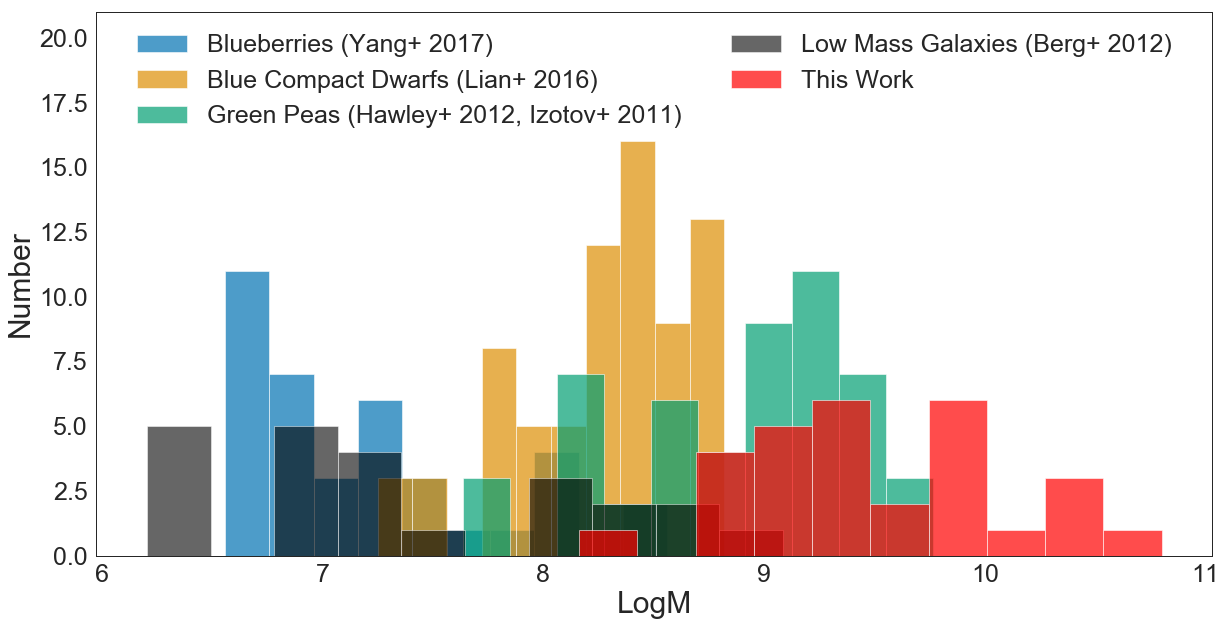

In [30]:
sns.set_style("white", {'axes.grid': False, "axes.facecolor": "1.0"})
#mass histogram of different populations
a = 0.7

plt.figure(figsize=(20,10))
bb_mass_cab.plot.hist(alpha=a, color=bb_c, label='Blueberries (Yang+ 2017)')
bcd_mass_cab.plot.hist(alpha=a, color=bcd_c, label='Blue Compact Dwarfs (Lian+ 2016)')
gp_mass_izotov_cab.plot.hist(alpha=a, color=gp_c, label='Green Peas (Hawley+ 2012, Izotov+ 2011)')
lmg_mass_cab.plot.hist(alpha=0.6, color=lmg_c, label='Low Mass Galaxies (Berg+ 2012)')
hps['LogM'].plot.hist(alpha=a, color=my_c, label='This Work')

plt.tick_params(axis='both', which='major', labelsize=25)
plt.ylim(0, 21)
plt.xlabel('LogM', fontsize=30)
plt.ylabel('Number', fontsize=30)

plt.legend(loc=9, fontsize=25, ncol=2, frameon=False)
plt.savefig(os.path.join(plot_path, 'mass_hist.pdf'), bbox_inches='tight')
plt.show()

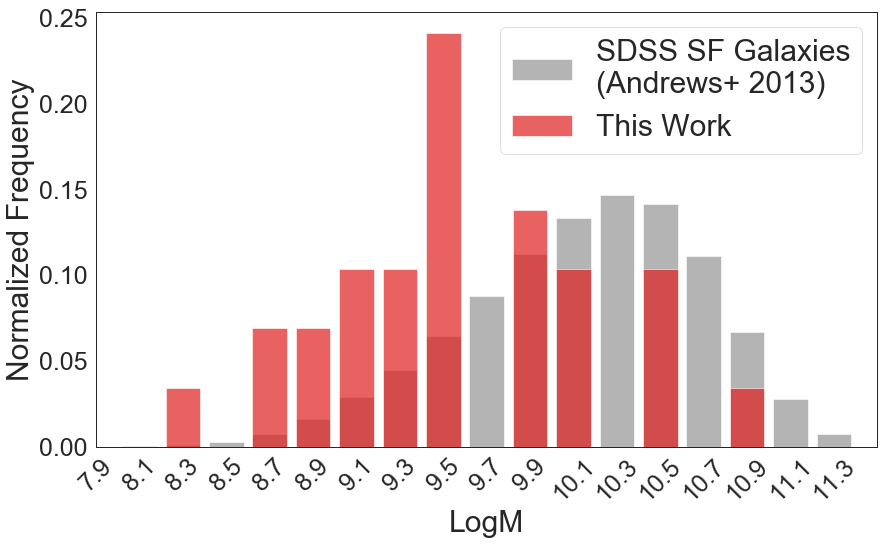

In [50]:
#mass histogram compared to SDSS
plt.figure(figsize=(14,8))

# print tot_sdss_gal
# ax = sns.barplot(x=mass_av_half, y=bb_mass_freq, color='blue', alpha=0.3, label='Blueberries (Yang+ 2017)')
# ax = sns.barplot(x=mass_av_half, y=bcd_mass_freq, color='orange', alpha=0.3, label='Blue Compact Dwarf (Lian+ 2016)')
# ax = sns.barplot(x=mass_av_half, y=gp_mass_freq, color='green', alpha=0.3, label='Green Peas (Hawley 2012, Izotov 2011)')
# ax = sns.barplot(x=mass_av_half, y=lmg_mass_freq, color='purple', alpha=0.3, label='Low Mass Galaxies (Berg 2012)')
ax = sns.barplot(x=mass_av_half, y=sdss_Ngal_half, color=cmap[7], alpha=0.7, label='SDSS SF Galaxies'+'\n'+'(Andrews+ 2013)')
ax = sns.barplot(x=mass_av_half, y=hps_mass_freq, color=my_c, alpha=0.7, label='This Work')

#hps['LogM'].hist(color='red',alpha=0.3, label='This Work')

for item in ax.get_xticklabels():
    item.set_rotation(45)

ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('LogM', fontsize=30)
ax.set_ylabel('Normalized Frequency', fontsize=30)
ax.set_xlim(4.0, 22)

plt.legend(loc=1, fontsize=30, frameon=True)
plt.savefig(os.path.join(plot_path, 'sdss_mass_hist.pdf'), bbox_inches='tight')
plt.show()

###   SFR

In [14]:
#SFR Bins

sdss_all = pd.read_csv('/Users/Briana/Documents/Grad_School/HPS/comparison_populations/SDSS_MZR/andrews_flux_table.csv')
sdss_sfr = sdss_all[~np.isnan(sdss_all['logSFRlo'])]
sdss_sfr = sdss_sfr.loc[:,['logSFR', 'logSFRlo', 'logSFRup', 'Ngal']]

sfr_bins = np.sort(sdss_sfr['logSFRlo'].unique())
#the names should be the median value of the bins
sfr_bin_names = (sfr_bins+(sfr_bins+0.5))/2.0
print sfr_bins

#count the number of galaxies in each sfr bin
sfr_bins_ngal = np.ones(len(sfr_bins))
for i in range(len(sfr_bins)):
    a = sdss_sfr[sdss_sfr['logSFRlo'] == sfr_bins[i]]['Ngal'].sum()
    sfr_bins_ngal[i] = a

#normalize sfr bins by total number of galaxies
tot_gal_sfr = np.sum(sfr_bins_ngal)
sfr_bins_ngal = np.divide(sfr_bins_ngal, tot_gal_sfr)

print sfr_bins_ngal

#bin the HPS data the same way 
hps_sfr = hps['SFR_met_corr'].values
hps_logsfr = np.log10(hps_sfr)

num_hps = len(hps)
hps_sfr_freq = np.zeros(len(sfr_bins))
for i in range(len(sfr_bins)):
    c=0
    for j in hps_logsfr:
        if sfr_bins[i] <= j < (sfr_bins[i]+0.5):
            c = c+1
    hps_sfr_freq[i] = (float(c)/num_hps)
    
print hps_sfr_freq

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
[0.00061386 0.00702412 0.06108757 0.22733594 0.39060191 0.25931117
 0.051809   0.00221643]
[0.         0.06896552 0.         0.34482759 0.34482759 0.24137931
 0.         0.        ]


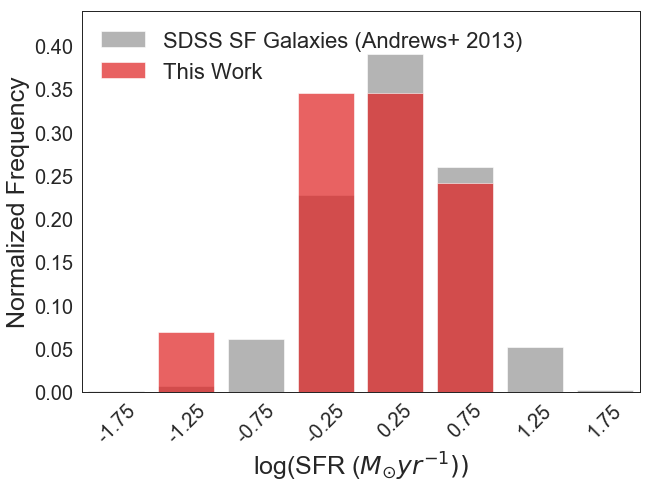

In [15]:
#SFR histogram compared to SDSS
plt.figure(figsize=(10,7))

# print tot_sdss_gal
ax = sns.barplot(x=sfr_bin_names, y=sfr_bins_ngal, color=cmap[7], alpha=0.7, label='SDSS SF Galaxies (Andrews+ 2013)')
ax = sns.barplot(x=sfr_bin_names, y=hps_sfr_freq, color=my_c, alpha=0.7, label='This Work')

for item in ax.get_xticklabels():
    item.set_rotation(45)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'log(SFR ($M_{\odot} yr^{-1}))$', fontsize=25)
ax.set_ylabel('Normalized Frequency', fontsize=25)
ax.set_ylim(0.0, 0.44)

plt.legend(loc=2, fontsize=22,  frameon=False)
plt.savefig(os.path.join(plot_path, 'sdss_SFR_hist.pdf'), bbox_inches='tight')
plt.show()

###  Linear SFR

In [16]:
#SFR Bins

sfr_bins_lin = 10**(sfr_bins)
sfr_bin_names_lin = 10**(sfr_bin_names)
print sfr_bins_lin

#bin the HPS data the same way 
hps_sfr = hps['SFR_met_corr'].values

num_hps = len(hps)
hps_sfr_freq_lin = np.zeros(len(sfr_bins_lin))
for i in range(len(sfr_bins_lin)):
    c=0
    for j in hps_sfr:
        if sfr_bins_lin[i] <= j < (sfr_bins_lin[i]+(10**0.5)):
            c = c+1
    hps_sfr_freq_lin[i] = (float(c)/num_hps)
    
print hps_sfr_freq_lin

[1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01]
[0.75862069 0.75862069 0.68965517 0.72413793 0.4137931  0.20689655
 0.         0.        ]


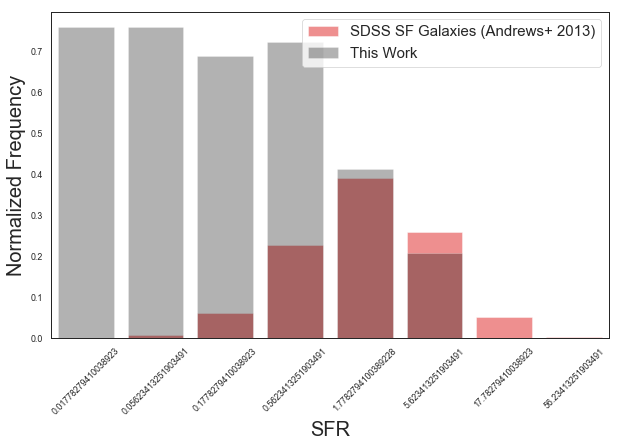

In [17]:
#SFR histogram compared to SDSS
plt.figure(figsize=(10,6))

# print tot_sdss_gal
ax = sns.barplot(x=sfr_bin_names_lin, y=sfr_bins_ngal, color='red', alpha=0.5, label='SDSS SF Galaxies (Andrews+ 2013)')
ax = sns.barplot(x=sfr_bin_names_lin, y=hps_sfr_freq_lin, color='black', alpha=0.3, label='This Work')

for item in ax.get_xticklabels():
    item.set_rotation(45)


ax.set_xlabel('SFR', fontsize=20)
ax.set_ylabel('Normalized Frequency', fontsize=20)

plt.legend(loc=1, fontsize=15)
plt.savefig(os.path.join(plot_path, 'sdss_lin_SFR_hist.png'))
plt.show()

###   Metallicity

In [18]:
#calculate representative metallicity for SDSS 
weighted_avg = np.average(sdss['metallicity'].values, weights=sdss['Ngal'].values)
print weighted_avg

8.904271242123322


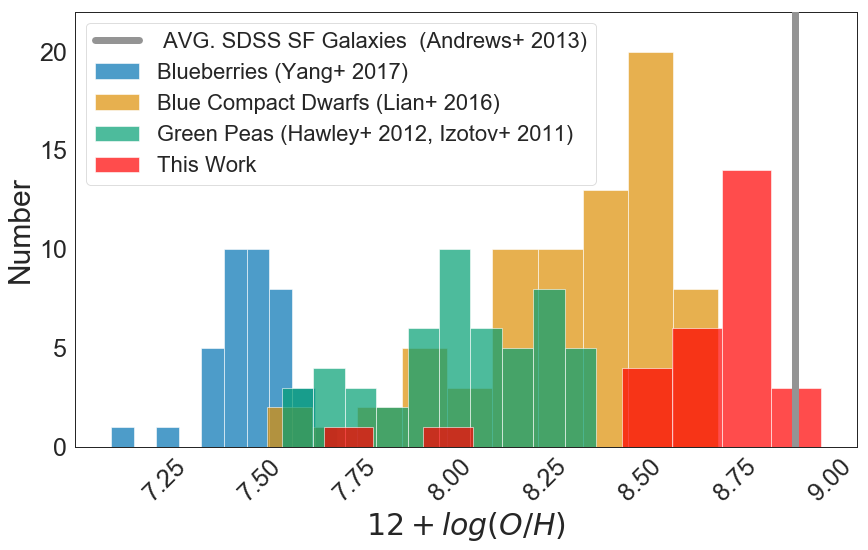

In [44]:
#metallicity histogram compared to different populations 
plt.figure(figsize=(14,8))

a=0.7
bb_metals.plot.hist(alpha=a, color=bb_c, label='Blueberries (Yang+ 2017)')
bcd_metals.plot.hist(alpha=a, color=bcd_c, label='Blue Compact Dwarfs (Lian+ 2016)')
gp_metals.plot.hist(alpha=a, color=gp_c, label='Green Peas (Hawley+ 2012, Izotov+ 2011)')
ax = hps['metallicity'].plot.hist(alpha=a, color=my_c, label='This Work', zorder=1001)

yvals = np.linspace(0.0, 22.0, 100)
plt.plot(np.ones(100)*weighted_avg, yvals, color=cmap[7], lw=7, zorder=2000, label=' AVG. SDSS SF Galaxies  (Andrews+ 2013)')

for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel(r'$12+log(O/H)$', fontsize=30)
plt.ylabel('Number', fontsize=30)
plt.ylim(0.0, 22.0)
plt.legend(loc=2, fontsize=22)

plt.savefig(os.path.join(plot_path, 'metallicity_hist.pdf'), bbox_inches='tight')
plt.show()

###   Redshift


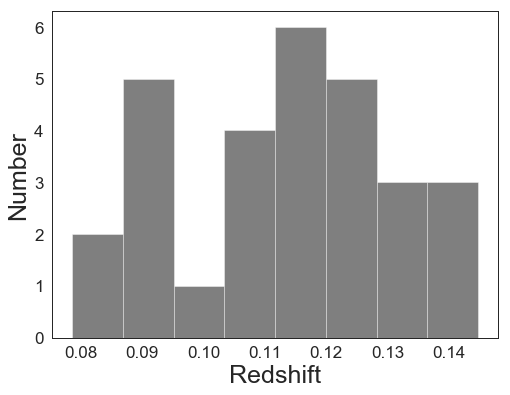

In [28]:
#redshift histogram 
plt.figure(figsize=(8,6))

hps['z'].plot.hist(alpha=0.5, color='black', label='This Work', bins=8)

plt.tick_params(axis='both', which='major', labelsize=17)
plt.xlabel('Redshift', fontsize=25)
plt.ylabel('Number', fontsize=25)
#plt.legend(loc=2)

plt.savefig(os.path.join(plot_path, 'redshift_hist.pdf'), bbox_inches='tight')
plt.show()